In [4]:
import pandas as pd
import numpy as np
from math import log2
import math

def shannon_entropy(x):
    """
    Calculate the Shannon entropy of a feature.
    """
    counts = np.bincount(x)
    probs = counts / len(x)
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

def feature_ranking(df, target_col):
    """
    Rank the features in a DataFrame using Shannon's entropy.
    """
    #features = df.drop(target_col, axis=1).columns
    features = df.copy()
    rankings = {}
    for feature in features:
        x = df[feature].values
        y = df[target_col].values
        mutual_info = shannon_entropy(y) - shannon_entropy(y[x])
        rankings[feature] = mutual_info
    rankings = {k: v for k, v in sorted(rankings.items(), key=lambda item: item[1], reverse=True)}
    return rankings

# Example usage
df = pd.read_csv('final.csv')
rankings = feature_ranking(df, 'target')
print(rankings)


IndexError: arrays used as indices must be of integer (or boolean) type

In [6]:
from datetime import date

def entropy(data):
    """Calculates Shannon's entropy for a given distribution"""
    # Compute the frequency of each class label
    value_counts = data.value_counts()
    # Compute the probability of each class label
    probabilities = value_counts / len(data)
    # Compute the entropy
    entropy = sum(-p * math.log2(p) for p in probabilities)
    return entropy

def feature_ranking(features, target):
    """
    Computes the feature ranking vector using Shannon's entropy as the scoring function.

    Args:
        features: A pandas dataframe containing the features.
        target: A pandas series containing the target variable.

    Returns:
        A pandas series containing the feature weights (in descending order).
    """
    feature_weights = {}
    for feature in features.columns:
        if feature not in ['id','index','text','user_id','created_at','url','expanded_url']:
            #feature_score = features.groupby(feature)[target]
            print(features.groupby(feature))
            feature_score = entropy(features.groupby(feature).apply(entropy))
            feature_weights[feature] = feature_score
    
    total_score = sum(feature_weights.values())
    feature_weights = {k: v/total_score for k, v in feature_weights.items()}
    
    return pd.Series(feature_weights).sort_values(ascending=False)

data = pd.read_csv('final.csv')

data = data.drop(range(30,len(data))) #take only the first 30 data

# Split the dataset into features and target
features = data.drop('target', axis=1)
target = data['target']

# Compute the feature weights using Shannon's entropy
feature_weights = feature_ranking(features, target)

# Print the feature weights
print(feature_weights)



number_of_redirects     0.305326
http_status             0.251794
is___present            0.158864
expiration_days_left    0.146462
page_rank               0.137554
inner_html              0.000000
is_@_present            0.000000
is_#_present            0.000000
is_redirected           0.000000
error_fetch             0.000000
is_abnormal             0.000000
dtype: float64


In [7]:
input_data = pd.read_csv('final.csv')
input_data


,index,id,text,user_id,url,target,expanded_url,inner_html,http_status,is_@_present,is___present,is_#_present,is_redirected,number_of_redirects,error_fetch,page_rank,is_abnormal,expiration_days_left
0,0,5.330000e+17,I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws,24858289,http://t.co/ahvQxUqTws,1,https://www.youtube.com/watch?v=Y6f6_WiyWjI,"b'<!DOCTYPE html><html style=""font-size: 10px;...",200.0,0,1,0,1,3,0,4.0,0,324.0
1,1,5.330000e+17,http://t.co/HyI5EQKz6Q,24858289,http://t.co/HyI5EQKz6Q,1,https://www.facebook.com/Davideb66/posts/10205...,"b'<!DOCTYPE html>\n<html lang=""ml"" id=""faceboo...",200.0,0,0,0,1,3,0,1.0,0,2924.0
2,2,5.330000e+17,"Tutti a tavola, con il filetto di baccalà. htt...",24858289,http://t.co/aHHbFXJbIS,1,https://www.mipiaceroma.it/blog,b'<!DOCTYPE html>\n<!--[if IE 9 ]><html class=...,200.0,0,0,0,1,5,0,44424115.0,0,287.0
3,3,5.320000e+17,http://t.co/NAHQ4l2pUy,24858289,http://t.co/NAHQ4l2pUy,1,https://www.facebook.com/Davideb66/posts/10205...,"b'<!DOCTYPE html>\n<html lang=""ml"" id=""faceboo...",200.0,0,0,0,1,3,0,1.0,0,2924.0
4,4,5.320000e+17,Gold - Spandau Ballet http://t.co/o8ZJHt7Neu,24858289,http://t.co/o8ZJHt7Neu,1,http://www.muzu.tv/spandau-ballet/gold-music-v...,"b'<!DOCTYPE html>\r\n<html lang=""en-US"">\r\n<h...",404.0,0,0,0,1,3,0,149230.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,92,5.866410e+17,"You can joke about the Prius, but look who's o...",722623,http://t.co/DbtNESOPpK,0,https://twitter.com/BuzzJackson/status/5866409...,"b'<!DOCTYPE html>\n<html dir=""ltr"" lang=""en"">\...",200.0,0,0,0,1,2,0,5.0,0,299.0
189,93,5.866370e+17,RT @ABC7: #CHASE: LAPD in pursuit of a stolen ...,722623,http://t.co/u5lTveArpy,0,https://abc7.com/watch/live/,b'\n <!doctype html>\n <html lan...,200.0,0,0,0,1,4,0,10570.0,0,128.0
190,94,5.862990e+17,And yet there will still be at least one on ev...,722623,https://t.co/DTSorUmOtA,0,https://twitter.com/kgun9/status/5862979740174...,"b'<!DOCTYPE html>\n<html dir=""ltr"" lang=""en"">\...",200.0,0,0,0,1,1,0,5.0,0,299.0
191,95,5.855680e+17,86-degrees in the hallway outside my office at...,722623,http://t.co/K8txd9MHx9,0,https://twitter.com/BuzzJackson/status/5855681...,"b'<!DOCTYPE html>\n<html dir=""ltr"" lang=""en"">\...",200.0,0,0,0,1,2,0,5.0,0,299.0


In [8]:
# input_data = data.copy()
input_data = input_data.drop(['index','id', 'text', 'url', 'expanded_url','user_id','index','inner_html'],axis = 1)

# df['Set_of_Numbers'] = df['Set_of_Numbers'].fillna(0)

input_data = input_data.dropna()
input_data

,target,http_status,is_@_present,is___present,is_#_present,is_redirected,number_of_redirects,error_fetch,page_rank,is_abnormal,expiration_days_left
0,1,200.0,0,1,0,1,3,0,4.0,0,324.0
1,1,200.0,0,0,0,1,3,0,1.0,0,2924.0
2,1,200.0,0,0,0,1,5,0,44424115.0,0,287.0
3,1,200.0,0,0,0,1,3,0,1.0,0,2924.0
5,1,200.0,0,0,0,1,5,0,1158775.0,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
188,0,200.0,0,0,0,1,2,0,5.0,0,299.0
189,0,200.0,0,0,0,1,4,0,10570.0,0,128.0
190,0,200.0,0,0,0,1,1,0,5.0,0,299.0
191,0,200.0,0,0,0,1,2,0,5.0,0,299.0


In [9]:
y = input_data['target'].values
columns_needed = list(input_data.columns)
columns_needed.remove('target')

x = input_data[columns_needed].values

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

## Logistic Regression

In [12]:
from sklearn import svm,linear_model
clf = linear_model.LogisticRegressionCV()
clf.fit(x_train, y_train)



LogisticRegressionCV()

In [13]:
y_pred = clf.predict(x_test)


In [14]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        16
           1       1.00      0.63      0.78        30

    accuracy                           0.76        46
   macro avg       0.80      0.82      0.76        46
weighted avg       0.86      0.76      0.76        46



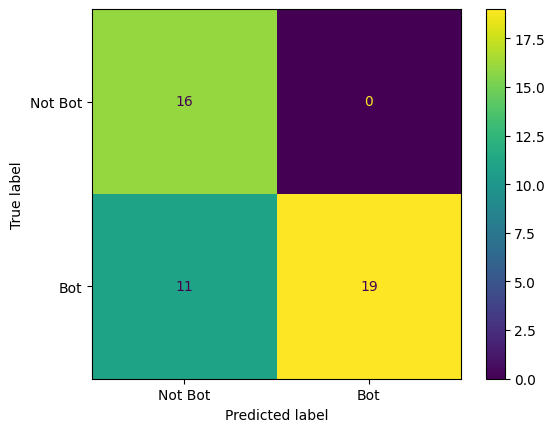

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Bot', 'Bot'])
cm_display.plot()
plt.show()

## Support Vector Machine

In [17]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='rbf')
svc_clf.fit(x_train,y_train)

SVC()

In [18]:
# Make prediction
y_pred = svc_clf.predict(x_test)

#print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.65      1.00      0.79        30

    accuracy                           0.65        46
   macro avg       0.33      0.50      0.39        46
weighted avg       0.43      0.65      0.51        46



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


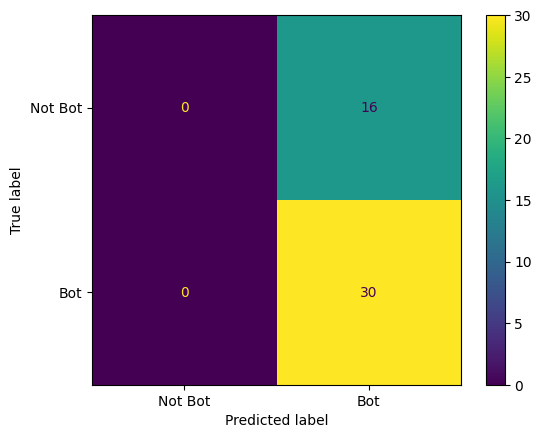

In [19]:
# print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Bot', 'Bot'])
cm_display.plot()
plt.show()

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
# Make prediction
y_pred = rf_clf.predict(x_test)

#print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        30

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.98        46
weighted avg       0.98      0.98      0.98        46



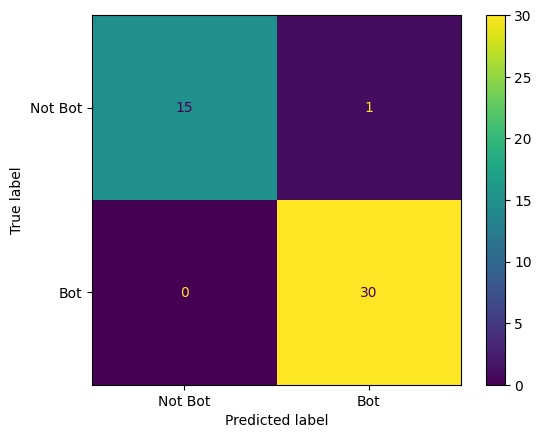

In [22]:
# print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Bot', 'Bot'])
cm_display.plot()
plt.show()

## MultiLayer Perceptron

In [24]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=300)
mlp_clf.fit(x_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [25]:
# Make prediction
y_pred = mlp_clf.predict(x_test)

#print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.74      0.93      0.82        30

    accuracy                           0.74        46
   macro avg       0.74      0.65      0.66        46
weighted avg       0.74      0.74      0.71        46



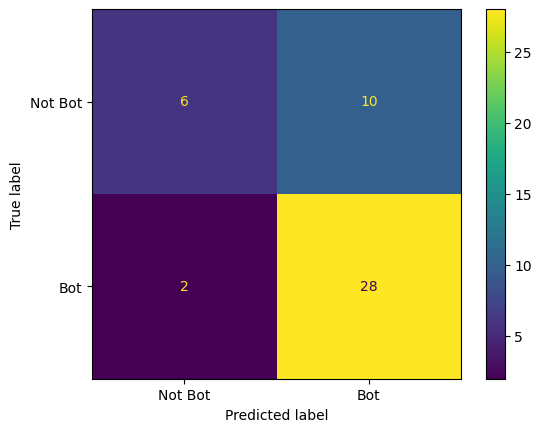

In [26]:
# print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Bot', 'Bot'])
cm_display.plot()
plt.show()